In [31]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix



In [51]:
props = pd.read_csv('../data/curated/places_property.csv')


In [52]:
props= props.drop([2887])
props = props.reset_index(drop= True)

In [57]:
external = pd.read_csv('Property_external.csv')
med = external['Median equivalised total household income (weekly) ($)']
props['Median equivalised total household income (weekly) ($)'] = med

In [58]:
features = [
    'Estimated resident population (no.)',
    'Population density (persons/km2)',
    'Median age - persons (years)',
    'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
    'Health care and social assistance (no.)','Financial and insurance services (no.)',
    'Administrative and support services (no.)','Education and training (no.)',
    'Accommodation and food services (no.)',
    'Value of residential building ($m)', 'Houses - total (no.)', 
    'Townhouses - total (no.)', 'Apartments - total (no.)',
    'Median weekly household rental payment ($)', 'Rented (no.)',
    'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
    'Value of residential building ($m)', 
    'Median weekly household rental payment ($)', 'num_stops',	'num_stations',
	'num_schools', 'num_restaurants', 'num_landmarks', 'total_transport', 'Median equivalised total household income (weekly) ($)'
]
X = props[features]
y= props['Prices']


In [59]:
X

,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Renter (no.),Health care and social assistance (no.),Financial and insurance services (no.),Administrative and support services (no.),Education and training (no.),Accommodation and food services (no.),...,"Used at least one form of public transport (train, tram, bus, ferry) (no.)",Value of residential building ($m),Median weekly household rental payment ($),num_stops,num_stations,num_schools,num_restaurants,num_landmarks,total_transport,Median equivalised total household income (weekly) ($)
0,37666.0,4420.4,74.1,25272.0,193.0,157.0,63.0,174.0,47.0,96.0,...,884.0,18.0,681.0,0.0,0.0,11.0,0.0,0.0,0.0,1866.0
1,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,41.0,28.0,68.0,...,343.0,35.0,440.0,0.0,0.0,13.0,0.0,0.0,0.0,1510.0
2,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,41.0,28.0,68.0,...,343.0,35.0,440.0,0.0,0.0,12.0,0.0,0.0,0.0,1510.0
3,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,41.0,28.0,68.0,...,343.0,35.0,440.0,0.0,1.0,12.0,0.0,0.0,1.0,1510.0
4,10564.0,1172.6,34.0,7808.0,53.0,69.0,21.0,45.0,19.0,43.0,...,382.0,8.0,369.0,0.0,0.0,8.0,0.0,0.0,0.0,1055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,22858.0,2941.3,63.4,15428.0,244.0,50.0,8.0,77.0,17.0,46.0,...,651.0,219.0,686.0,0.0,0.0,3.0,0.0,0.0,0.0,2036.0
4366,28738.0,1704.2,78.8,18016.0,102.0,140.0,99.0,124.0,27.0,119.0,...,600.0,196.0,790.0,0.0,1.0,5.0,0.0,0.0,1.0,2036.0
4367,18665.0,1770.6,40.9,12311.0,67.0,45.0,33.0,56.0,17.0,38.0,...,380.0,11.0,341.0,0.0,1.0,4.0,0.0,0.0,1.0,2288.0
4368,23187.0,1174.1,43.3,14432.0,36.0,206.0,115.0,98.0,42.0,73.0,...,241.0,33.0,380.0,0.0,0.0,0.0,0.0,0.0,0.0,992.0


<Axes: >

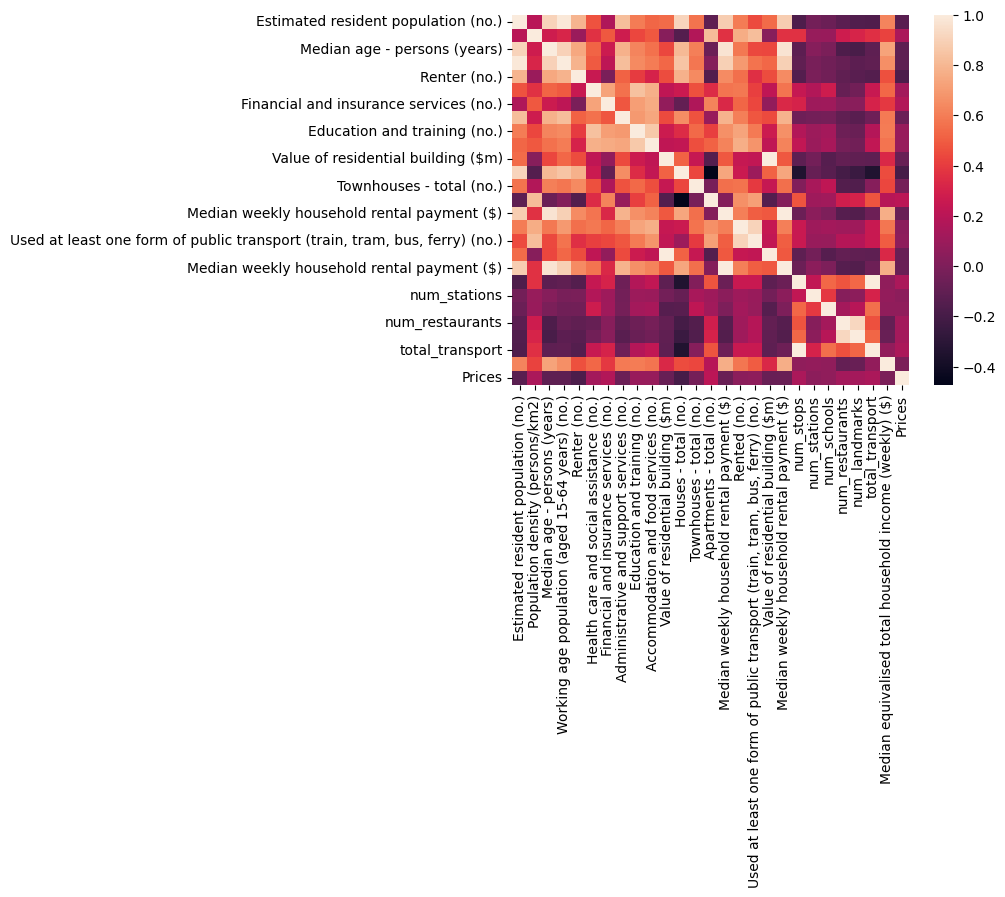

In [19]:
heatmap_features = features
heatmap_features.append('Prices')

heatmap_data = props[heatmap_features]
sns.heatmap(heatmap_data.corr())

In [60]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=20037)





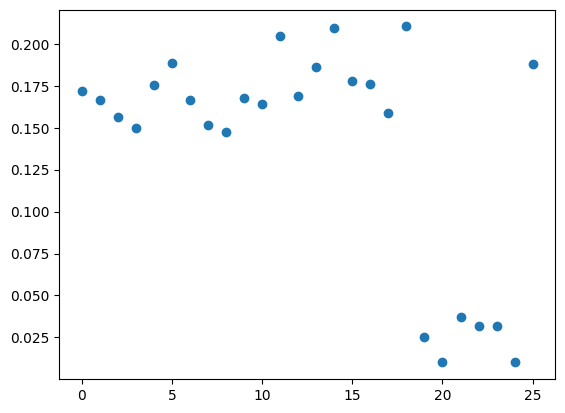

In [47]:
test = SelectKBest(score_func=mutual_info_classif, k=26)
fit = test.fit(X, y_encoded)

# Summarize scores
np.set_printoptions(precision=3)
i= range(26)
plt.scatter(i, fit.scores_)



In [49]:
#SO take the best k = 20, since 6 clearly are not good
test = SelectKBest(score_func=mutual_info_classif, k=20)
fit = test.fit(X, y_encoded)



new_features = fit.transform(X)
    
new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features

['Estimated resident population (no.)',
 'Population density (persons/km2)',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Renter (no.)',
 'Health care and social assistance (no.)',
 'Financial and insurance services (no.)',
 'Administrative and support services (no.)',
 'Education and training (no.)',
 'Accommodation and food services (no.)',
 'Value of residential building ($m)',
 'Houses - total (no.)',
 'Townhouses - total (no.)',
 'Apartments - total (no.)',
 'Median weekly household rental payment ($)',
 'Rented (no.)',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
 'Value of residential building ($m)',
 'Median weekly household rental payment ($)',
 'Median equivalised total household income (weekly) ($)']

In [70]:
import scipy.stats as stats

# Sample data for three groups
group1 = X['Estimated resident population (no.)']
group2 = X['Population density (persons/km2)']
group3 = X['Median age - persons (years)']
group4 = X['Rented (no.)']
group5 = X['Renter (no.)']
group6 = X['Health care and social assistance (no.)']
group7 = X['Financial and insurance services (no.)']
group8 = X['Administrative and support services (no.)']
group9 = X['Education and training (no.)']
group10 = X['Accommodation and food services (no.)']
group11= X['Value of residential building ($m)']
group12 = X['Houses - total (no.)']
group13 = X['Apartments - total (no.)']
group14 = X['Median weekly household rental payment ($)']
group15 = X['Used at least one form of public transport (train, tram, bus, ferry) (no.)']
group16 = X['Median equivalised total household income (weekly) ($)']

group11 = group11.iloc[: , :-1]
group14 = group14.iloc[: , :-1]

group11 = group11['Value of residential building ($m)']
group14 = group14['Median weekly household rental payment ($)']

# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16)

# Print the results
print("One-way ANOVA Results:")
print("F-statistic:", statistic)
print("P-value:", p_value)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between groups.")

One-way ANOVA Results:
F-statistic: 7507.450731300991
P-value: 0.0
Reject the null hypothesis. There is a significant difference between groups.


In [69]:
group1

0       37666.0
1       12561.0
2       12561.0
3       12561.0
4       10564.0
         ...   
4365    22858.0
4366    28738.0
4367    18665.0
4368    23187.0
4369    39748.0
Name: Estimated resident population (no.), Length: 4370, dtype: float64

In [8]:

rfc  = RandomForestClassifier(max_depth= 6, max_features='sqrt', n_estimators=300, random_state=18).fit(X_train, y_train)


y_pred = rfc.predict(X_test)


print('Model accuracy score with 300 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 300 decision-trees : 0.0686


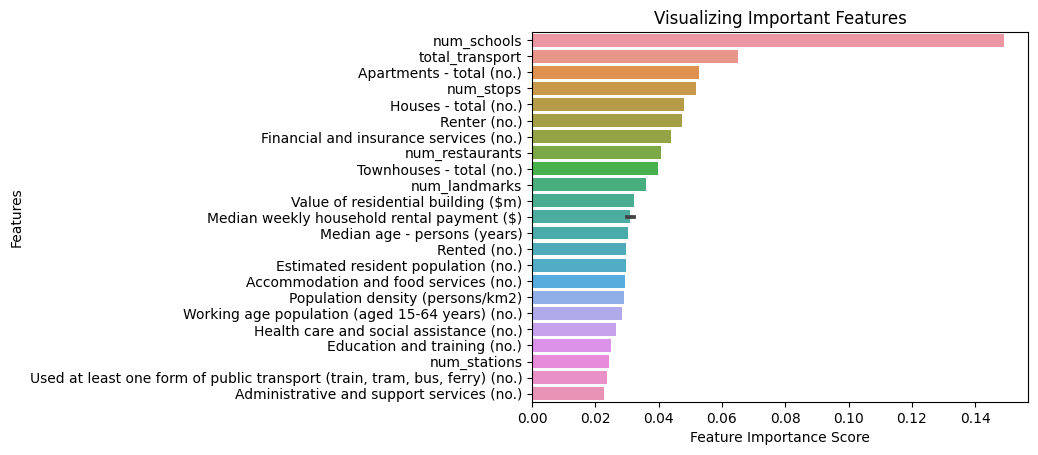

<Figure size 640x480 with 0 Axes>

In [9]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()
plt.savefig('visualising_important_features')

KMEANS

[0.6098870261543127, 0.4628216623405003, 0.46600988676971156, 0.4049065195310748, 0.42099828508442205, 0.386231242342668, 0.3820921196667229, 0.40318937217393414, 0.3985247286284384, 0.4010012099669093, 0.41455850060866356, 0.4092760109071908, 0.4181513910640044]


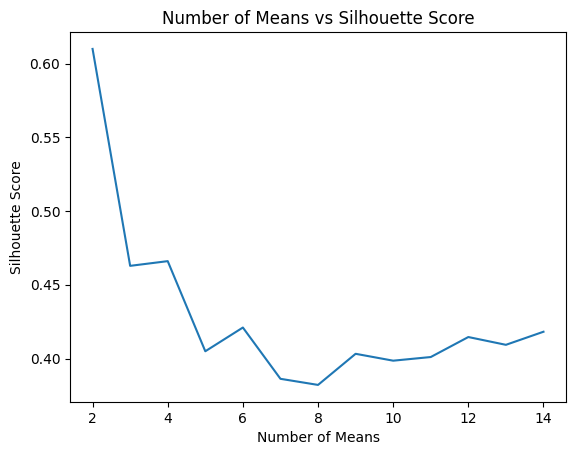

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20037)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans = KMeans(n_clusters=10, random_state=8, n_init='auto')
kmeans.fit(X_train_norm)

from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

K = range(2, 15)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print(score)

sns.lineplot(x = K, y = score).set( title = 'Number of Means vs Silhouette Score', xlabel = 'Number of Means', ylabel  = 'Silhouette Score')
plt.savefig('Silhouette Score')
#Lower the better for the score

0.3820921196667229


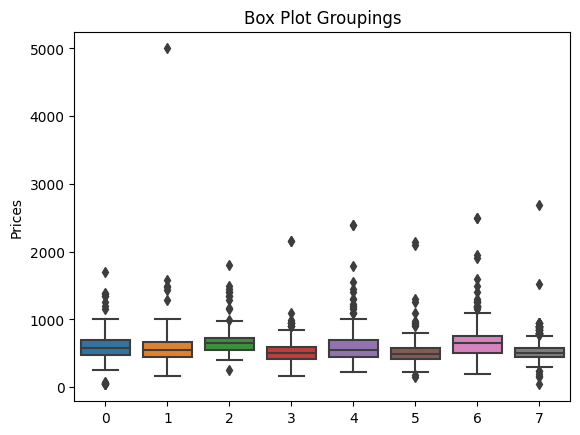

In [14]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

print(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))


sns.boxplot(x = kmeans.labels_, y = y_train).set(title = 'Box Plot Groupings')
plt.savefig('Price Box Plots')